<a href="https://colab.research.google.com/github/NarayaniSuresh/CSE340/blob/main/Lab_7_Implement_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')

import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
# Step 2: Load the Dataset
dataset = pd.read_csv("PJME_hourly.csv")


In [ ]:
# Step 3: Plot the Dataset
plt.figure(figsize=(15, 6))
plt.plot(dataset['Datetime'], dataset['PJME_MW'])
plt.title('Hourly Energy Consumption')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption (MW)')
plt.show()

In [6]:
import random

# Step 3: Plot the Dataset
plt.figure(figsize=(15, 6))

# Subsample the dataset
sample_size = 1000  # Adjust the sample size as needed
sample_indices = random.sample(range(len(dataset)), sample_size)
sampled_data = dataset.iloc[sample_indices]

plt.plot(sampled_data['Datetime'], sampled_data['PJME_MW'])
plt.title('Hourly Energy Consumption (Subsampled)')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption (MW)')
plt.show()


In [7]:

# Step 4: Split the Data
train_size = int(len(dataset) * 0.8)
train, test = dataset[:train_size], dataset[train_size:]

In [8]:

# 4) Split the data into training and testing sets
X = sampled_data.drop(columns=['Datetime', 'PJME_MW'])
y = sampled_data['PJME_MW']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Step 5: Visualize Train/Test Split
plt.figure(figsize=(15, 6))
plt.plot(train['Datetime'], train['PJME_MW'], label='Train')
plt.plot(test['Datetime'], test['PJME_MW'], label='Test')
plt.title('Train/Test Split Based on Time')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()

KeyboardInterrupt: 

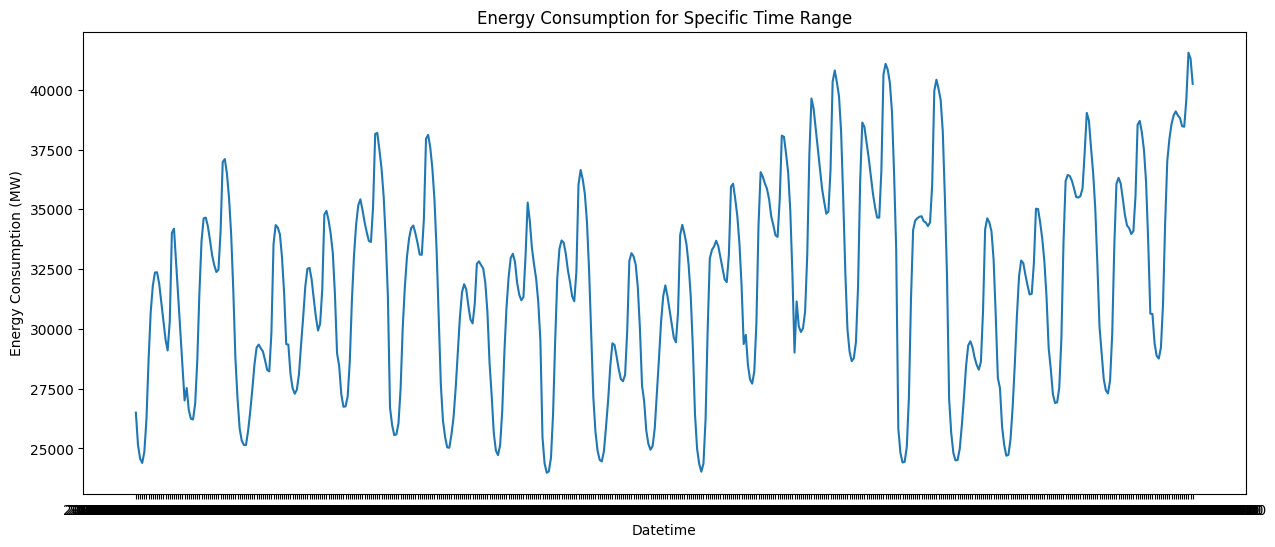

In [ ]:
# Step 6: Plot Specific Time Range (optional)
plt.figure(figsize=(15, 6))
plt.plot(train['Datetime'][:500], train['PJME_MW'][:500])
plt.title('Energy Consumption for Specific Time Range')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption (MW)')
plt.show()

In [10]:
# Step 7: Create Time-based Features
dataset['Datetime'] = pd.to_datetime(dataset['Datetime'])
dataset['Hour'] = dataset['Datetime'].dt.hour
dataset['Month'] = dataset['Datetime'].dt.month

In [11]:

# Step 8: Visualize Feature Dataset by Hour/Month
plt.figure(figsize=(15, 6))
sns.boxplot(x='Hour', y='PJME_MW', data=dataset)
plt.title('Energy Consumption by Hour')
plt.xlabel('Hour')
plt.ylabel('Energy Consumption (MW)')
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x='Month', y='PJME_MW', data=dataset)
plt.title('Energy Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (MW)')
plt.show()

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116292 entries, 0 to 116291
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  116292 non-null  object 
 1   PJME_MW   116292 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.8+ MB


In [ ]:
# Split Data into Features and Target
X_train = train[['Hour', 'Month']]

In [ ]:
y_train = train['PJME_MW']


In [ ]:
# Assuming you also have a test DataFrame with similar structure
test['Datetime'] = pd.to_datetime(test['Datetime'])
test['Hour'] = test['Datetime'].dt.hour
test['Month'] = test['Datetime'].dt.month
X_test = test[['Hour', 'Month']]
y_test = test['PJME_MW']

In [ ]:
# Train the XGBoost Model
model = XGBRegressor()
model.fit(X_train, y_train)

In [ ]:



# Step 10: Feature Importance Analysis and Predictions
feature_importances = model.feature_importances_
print("Feature Importances:", feature_importances)

y_pred = model.predict(X_test)


NameError: name 'model' is not defined

In [ ]:

# Step 11: Merge Predictions into Original Dataset
test['Predicted'] = y_pred

In [ ]:
# Step 12: Calculate Errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)


In [15]:
# Experiment with Configurations (optional)
# Adjusting hyperparameters of the XGBoost model

# Example: Experimenting with learning rate and max depth
learning_rates = [0.05, 0.1, 0.3]
max_depths = [3, 5, 7]

best_mae = float('inf')
best_params = {}

for lr in learning_rates:
    for depth in max_depths:
        model = XGBRegressor(learning_rate=lr, max_depth=depth)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        if mae < best_mae:
            best_mae = mae
            best_params = {'learning_rate': lr, 'max_depth': depth}

print("Best MAE:", best_mae)
print("Best Hyperparameters:", best_params)


XGBoostError: [18:36:19] /workspace/src/data/iterative_dmatrix.cc:202: Check failed: n_features >= 1 (0 vs. 1) : Data must has at least 1 column.
Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3effba) [0x7b0fd6420fba]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3f59b7) [0x7b0fd64269b7]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3f8858) [0x7b0fd6429858]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3a2a07) [0x7b0fd63d3a07]
  [bt] (4) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGQuantileDMatrixCreateFromCallback+0x2b0) [0x7b0fd6196c40]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7b103ef37e2e]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7b103ef34493]
  [bt] (7) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa3e9) [0x7b103ef5d3e9]
  [bt] (8) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x9a00) [0x7b103ef5ca00]

